# Link del dataset

No se podia subir el archivo a github

https://drive.google.com/drive/folders/1CZ89FeqT-V4MPW6T-9jh4dTV0UZNLtyT?usp=drive_link

In [1]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exportación del df

In [17]:
df_rendimiento = pd.read_csv('20240209_Rendimiento_2023_20240131_WEB.csv', sep=';', encoding='UTF-8')
df_rendimiento

C:\Users\benja\AppData\Local\Temp\ipykernel_21856\2955686522.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rendimiento = pd.read_csv('20240209_Rendimiento_2023_20240131_WEB.csv', sep=';', encoding='UTF-8')


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
1,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,7",94,P,P,0
2,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,7",100,P,P,0
4,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584325,2023,42211,8,COLEGIO PUCAIQUEN,5,VALPO,56,5606,SANTO DOMINGO,54,...,5601,SAN ANTONIO,0,0,0,"6,8",88,P,P,0
3584326,2023,42211,8,COLEGIO PUCAIQUEN,5,VALPO,56,5606,SANTO DOMINGO,54,...,13114,LAS CONDES,0,0,0,"6,8",91,P,P,0
3584327,2023,42211,8,COLEGIO PUCAIQUEN,5,VALPO,56,5606,SANTO DOMINGO,54,...,5606,SANTO DOMINGO,0,0,0,"6,3",71,P,P,0
3584328,2023,42211,8,COLEGIO PUCAIQUEN,5,VALPO,56,5606,SANTO DOMINGO,54,...,5606,SANTO DOMINGO,0,0,0,"6,9",92,P,P,0


# Limpiando datos y manejo de ceros
La columna **PROM_GRAL** daba errores por el tipo de objeto que contenia, por lo cual se transformó a tipo float pero antes se reemplazaron las "," por puntos para hacer la transformación correcta y asi poder calcular estadisticos basicos de descripción.

Respecto al **df_matricula_rm** no hay mucha información para graficar o analizar a mi parecer por si sola.

In [18]:
##Arreglo de los valores de PROM_GRAL
#Convertimos a string temporalmente si es necesario, para poder hacer el replace
df_rendimiento.loc[:, 'PROM_GRAL'] = df_rendimiento['PROM_GRAL'].astype(str).str.replace(',', '.', regex=False)

#Convertimos la columna a tipo float
df_rendimiento.loc[:, 'PROM_GRAL'] = df_rendimiento['PROM_GRAL'].astype(float)

#Seleccionamos columnas de interés
df_rendimiento = df_rendimiento[["COD_ENSE2", "RBD", "MRUN", "NOM_RBD", "NOM_COM_RBD", "NOM_REG_RBD_A", 
                                 "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R", "RURAL_RBD", "COD_JOR", 
                                 "GEN_ALU","COD_COM_RBD","EDAD_ALU"]]

#Manejo de valores 0.0 para estudiantes que han cambiado de curso y/o establecimiento educacional
print("Cantidad de estudiantes que se cambiaron de curso o colegio:", len(df_rendimiento[df_rendimiento.duplicated('MRUN', keep=False)]))
duplicados = df_rendimiento[df_rendimiento.duplicated('MRUN', keep=False)]
duplicados0 = duplicados[duplicados["PROM_GRAL"] == 0.0]
df_rendimiento0 = df_rendimiento.drop(duplicados0.index)

#Filtro rendimiento a RM
df_rendimiento_rm = df_rendimiento0[df_rendimiento0["NOM_REG_RBD_A"] == "RM"]

#Manejo de valores 0.0 para estudiantes sin información en la columna de género
print("Cantidad de estudiantes sin información en GEN_ALU:", len(df_rendimiento_rm[df_rendimiento_rm['GEN_ALU'] == 0]))
SINGEN = df_rendimiento_rm[df_rendimiento_rm['GEN_ALU'] == 0]
df_rendimiento_rm = df_rendimiento_rm.drop(SINGEN.index)

#Estadísticas de resumen
print("Promedio RM:", df_rendimiento_rm["PROM_GRAL"].mean())
print("Ceros en PROM_GRAL:", len(df_rendimiento_rm[df_rendimiento_rm['PROM_GRAL'] == 0]))

#Educación especial
ESP = df_rendimiento_rm[df_rendimiento_rm["COD_ENSE2"] == 4]
df_rendimiento_rm = df_rendimiento_rm.drop(ESP.index)
print("Ceros en PROM_GRAL despues del filtro ED ESP:", len(df_rendimiento_rm[df_rendimiento_rm['PROM_GRAL'] == 0]))
print(len(df_rendimiento_rm))

#Valores " " EDAD_ALU
EDAD = df_rendimiento_rm[df_rendimiento_rm["EDAD_ALU"] == " "]
df_rendimiento_rm = df_rendimiento_rm.drop(EDAD.index)

categorias_reprobado = ['R', 'Y', 'T']

#RYT
df_rendimiento_rm['RYT'] = df_rendimiento_rm['SIT_FIN_R'].apply(lambda x: 0 if x in categorias_reprobado else 1)

#Contar la cantidad de estudiantes por establecimiento (columna RBD)
df_rendimiento_rm['CAN_EST'] = df_rendimiento_rm.groupby('RBD')['RBD'].transform('count')


df_rendimiento_rm


Cantidad de estudiantes que se cambiaron de curso o colegio: 434327
Cantidad de estudiantes sin información en GEN_ALU: 3
Promedio RM: 5.547517981614033
Ceros en PROM_GRAL: 92263
Ceros en PROM_GRAL despues del filtro ED ESP: 30188
1188072


,AGNO,COD_ENSE2,RBD,MRUN,NOM_RBD,NOM_COM_RBD,NOM_REG_RBD_A,PROM_GRAL,ASISTENCIA,SIT_FIN_R,RURAL_RBD,COD_JOR,GEN_ALU,COD_COM_RBD,EDAD_ALU,RYT,CAN_EST
1299499,2023,2,8485,304966,LICEO INSTITUTO NACIONAL,SANTIAGO,RM,6.1,99,P,0,2,1,13101,12,1,3361
1299500,2023,2,8485,1447936,LICEO INSTITUTO NACIONAL,SANTIAGO,RM,7.0,100,P,0,2,1,13101,13,1,3361
1299501,2023,2,8485,3653987,LICEO INSTITUTO NACIONAL,SANTIAGO,RM,6.7,95,P,0,2,1,13101,12,1,3361
1299502,2023,2,8485,4330537,LICEO INSTITUTO NACIONAL,SANTIAGO,RM,6.4,98,P,0,2,1,13101,13,1,3361
1299504,2023,2,8485,4558366,LICEO INSTITUTO NACIONAL,SANTIAGO,RM,6.1,98,P,0,2,1,13101,12,1,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583690,2023,2,42162,21617954,ESCUELA BASICA COLEGIO SAN FERNANDO DE BUIN-OR...,BUIN,RM,5.3,93,P,0,3,1,13402,13,1,251
3583691,2023,2,42162,22389142,ESCUELA BASICA COLEGIO SAN FERNANDO DE BUIN-OR...,BUIN,RM,6.3,92,P,0,3,2,13402,13,1,251
3583692,2023,2,42162,22819073,ESCUELA BASICA COLEGIO SAN FERNANDO DE BUIN-OR...,BUIN,RM,6.5,98,P,0,3,1,13402,14,1,251
3583693,2023,2,42162,24748270,ESCUELA BASICA COLEGIO SAN FERNANDO DE BUIN-OR...,BUIN,RM,5.1,92,P,0,3,1,13402,13,1,251


# Graficos

## Grafico de promedios de alumnos por comuna

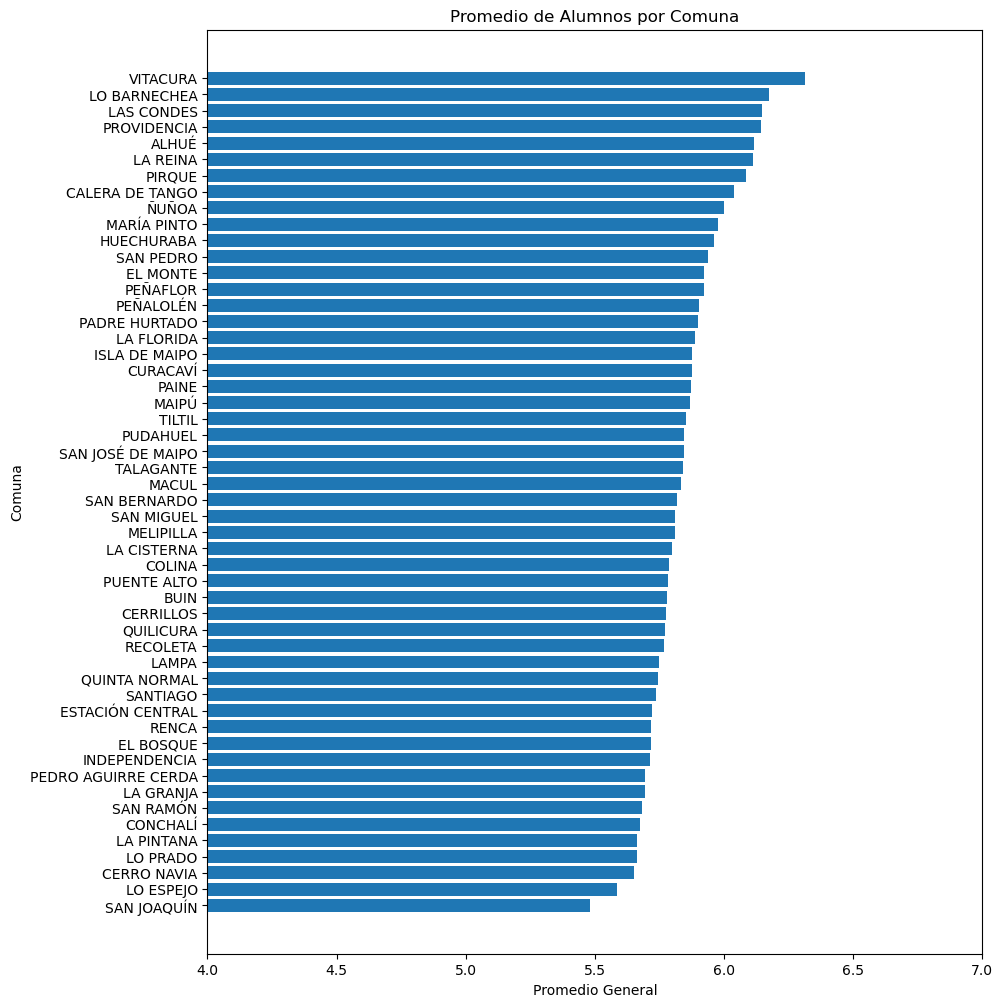

In [6]:
PROM_COM = df_rendimiento_rm.groupby('NOM_COM_RBD')['PROM_GRAL'].mean().reset_index()

#Ordenadito todo se ve mejor
PROM_COM = PROM_COM.sort_values(by='PROM_GRAL', ascending=True)

#Grafico
fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(PROM_COM['NOM_COM_RBD'], PROM_COM['PROM_GRAL'])

#Separamos un poquito para que se vea decente
ax.set_yticks(range(len(PROM_COM)))
ax.set_yticklabels(PROM_COM['NOM_COM_RBD'], fontsize=10)

#Etiquetas
ax.set_title("Promedio de Alumnos por Comuna")
ax.set_xlabel('Promedio General')
ax.set_ylabel('Comuna')

#ajustamos
ax.set_xlim(4, 7)
ax.xaxis.set_ticks([4,4.5,5, 5.5, 6, 6.5, 7])

plt.show()


## Grafico de promovidos por comuna

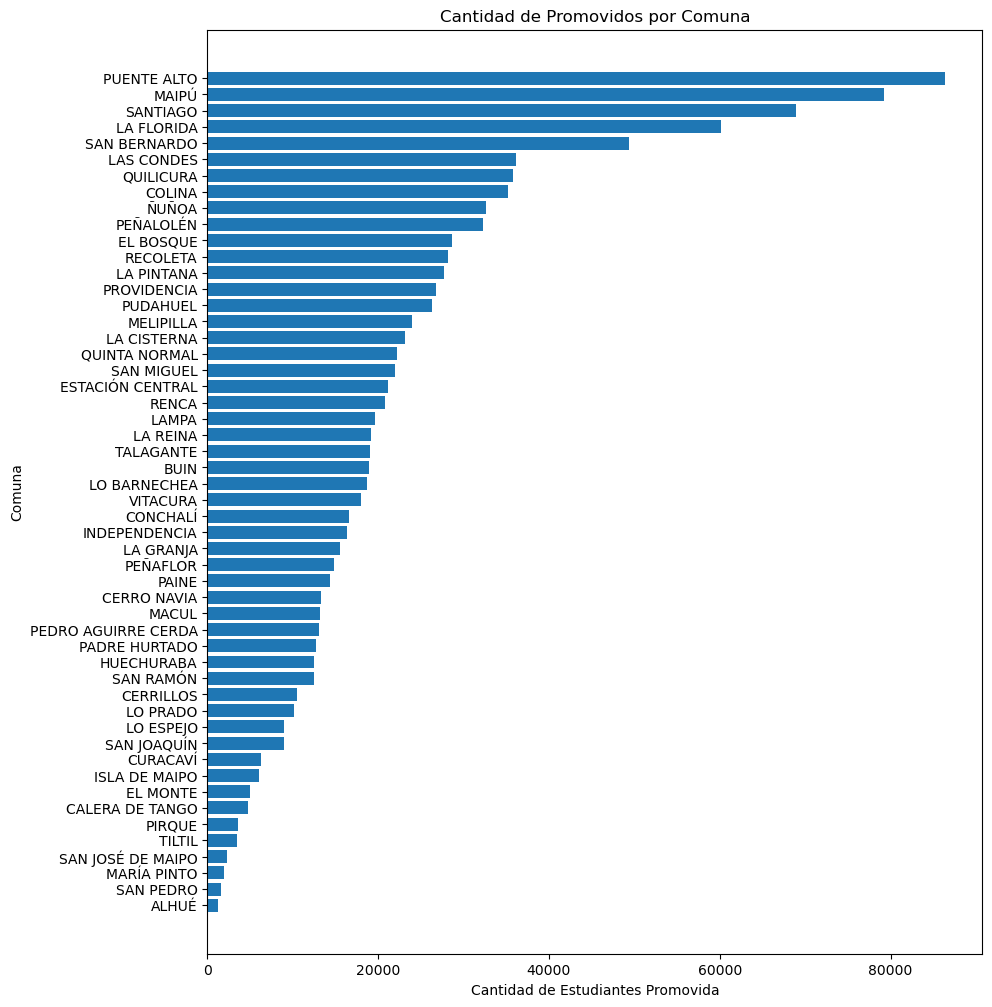

In [7]:
df_promovidos = df_rendimiento_rm[df_rendimiento_rm['SIT_FIN_R'] == 'P']
promovidos = df_promovidos.groupby('NOM_COM_RBD').size().reset_index(name='promovidos')

promovidos = promovidos.sort_values(by='promovidos', ascending=True)


fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(promovidos['NOM_COM_RBD'], promovidos['promovidos'])

ax.set_yticks(range(len(promovidos)))
ax.set_yticklabels(promovidos['NOM_COM_RBD'], fontsize=10)

ax.set_title("Cantidad de Promovidos por Comuna")
ax.set_xlabel('Cantidad de Estudiantes Promovida')
ax.set_ylabel('Comuna')

plt.show()


## Grafico de estudiantes con asistencia menor a 85% por comuna

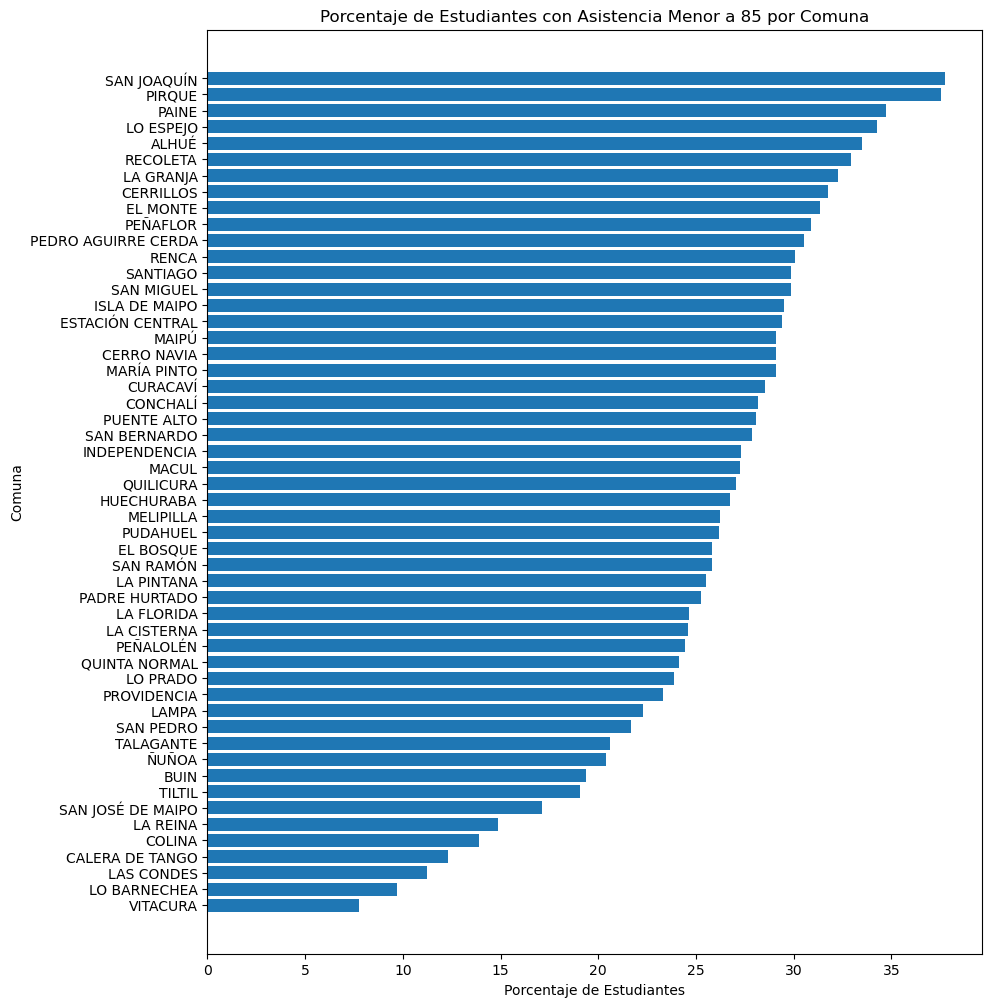

In [8]:
#Total de estudiantes por comuna
total_estudiantes = df_rendimiento_rm.groupby('NOM_COM_RBD').size().reset_index(name='total_estudiantes')

#Filtrar estudiantes con asistencia menor a 85
df_asistencia_baja = df_rendimiento_rm[df_rendimiento_rm['ASISTENCIA'] < 85]

asistencia_baja = df_asistencia_baja.groupby('NOM_COM_RBD').size().reset_index(name='asistencia_baja')

df_merged = pd.merge(asistencia_baja, total_estudiantes, on='NOM_COM_RBD')

df_merged['porcentaje_asistencia_baja'] = (df_merged['asistencia_baja'] / df_merged['total_estudiantes']) * 100

#ordenadito
df_merged = df_merged.sort_values(by='porcentaje_asistencia_baja', ascending=True)

#grafico
fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(df_merged['NOM_COM_RBD'], df_merged['porcentaje_asistencia_baja'])

ax.set_yticks(range(len(df_merged)))
ax.set_yticklabels(df_merged['NOM_COM_RBD'], fontsize=10)

ax.set_title("Porcentaje de Estudiantes con Asistencia Menor a 85 por Comuna")
ax.set_xlabel('Porcentaje de Estudiantes')
ax.set_ylabel('Comuna')

plt.show()


## Grafico de porcentaje de estudiantes promovidos por comuna

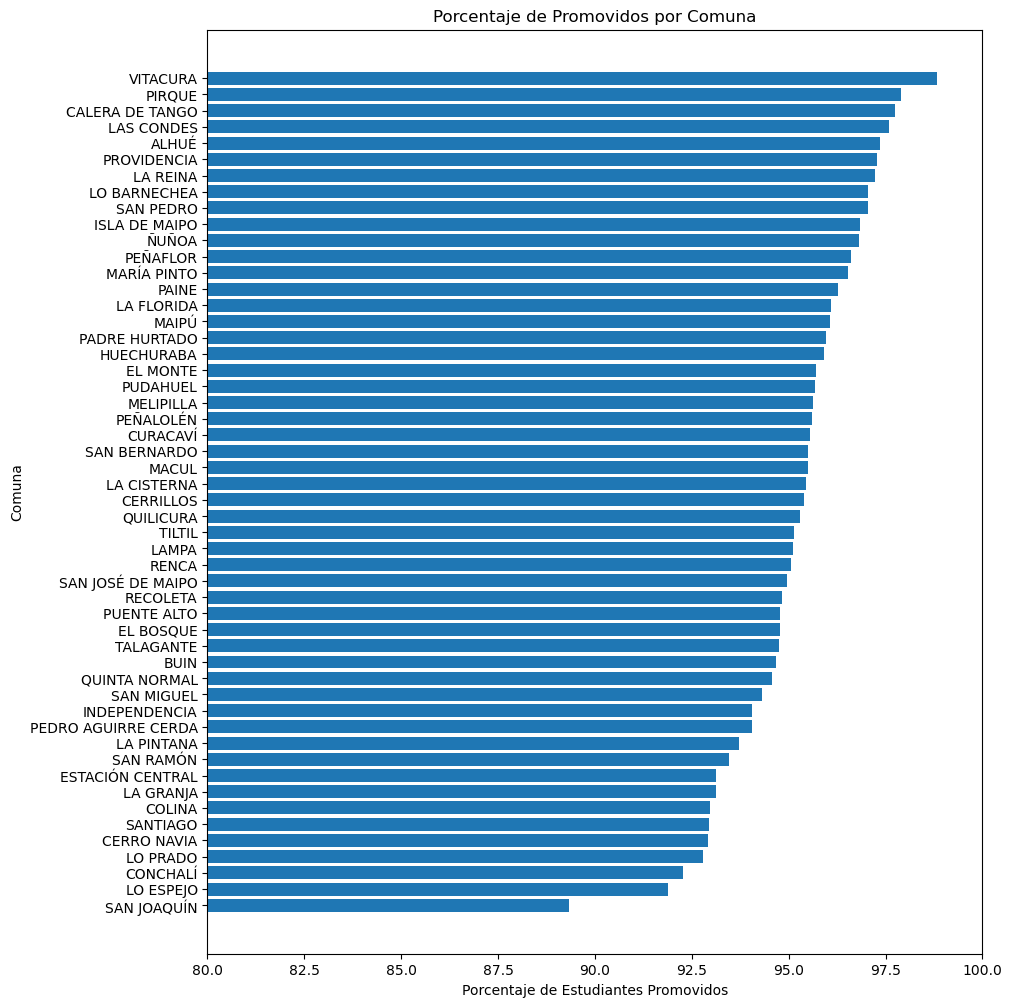

In [9]:
df_promovidos_p = df_rendimiento_rm[df_rendimiento_rm['SIT_FIN_R'] == 'P']

#Total de estudiantes y promovidos por comuna
total_comuna = df_rendimiento_rm.groupby('NOM_COM_RBD').size().reset_index(name="total")
promovidos_comuna = df_promovidos_p.groupby('NOM_COM_RBD').size().reset_index(name="promovidos")


promovidos_p = pd.merge(total_comuna, promovidos_comuna, on='NOM_COM_RBD')
promovidos_p["promovidos_p"] = (promovidos_p["promovidos"] / promovidos_p["total"]) * 100

#Ordenadito
promovidos_p = promovidos_p.sort_values(by="promovidos_p", ascending=True)

fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(promovidos_p['NOM_COM_RBD'], promovidos_p['promovidos_p'])

#Separamos un poquito para que se vea decente
ax.set_yticks(range(len(promovidos_p)))
ax.set_yticklabels(promovidos_p['NOM_COM_RBD'], fontsize=10)
ax.set_xlim(80, 100)

ax.set_title("Porcentaje de Promovidos por Comuna")
ax.set_xlabel("Porcentaje de Estudiantes Promovidos")
ax.set_ylabel("Comuna")

plt.show()


## Grafico de porcentaje de estudiantes retirados por comuna

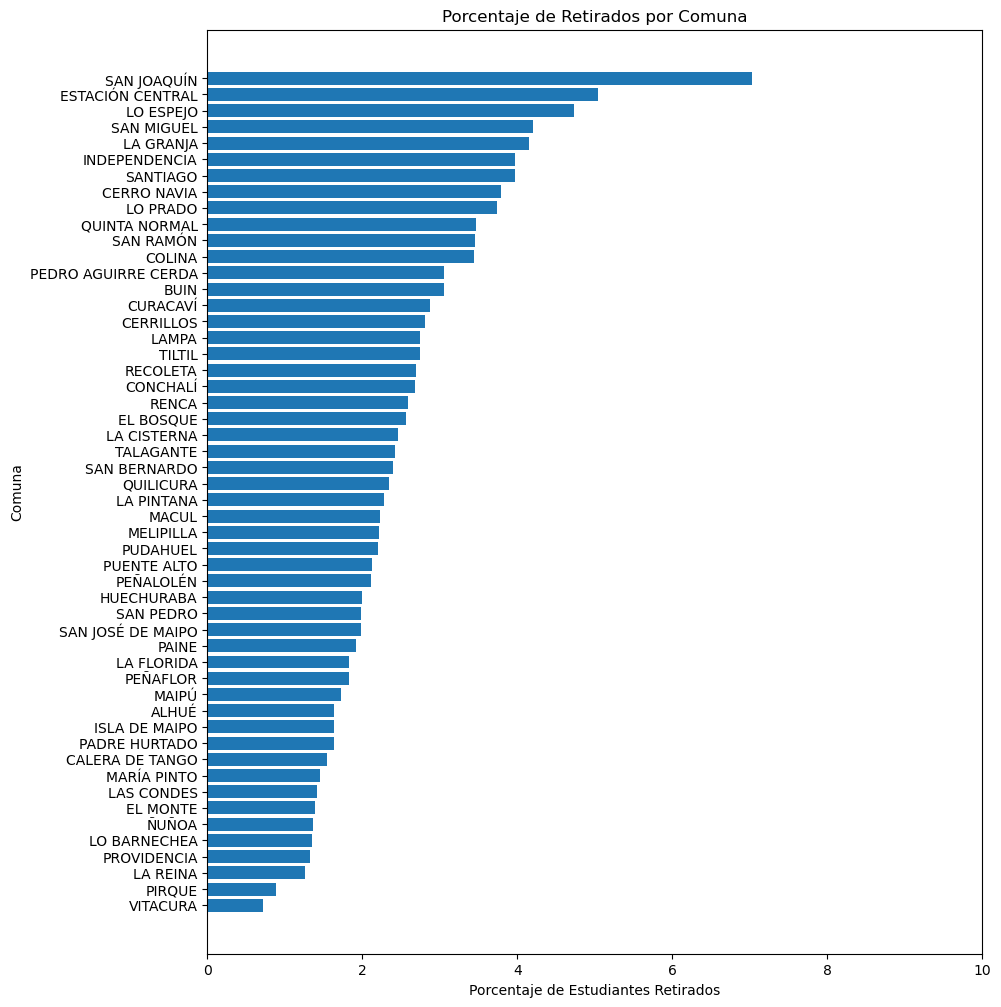

In [10]:
df_retirados_p = df_rendimiento_rm[df_rendimiento_rm['SIT_FIN_R'] == 'Y']

#Total de estudiantes y promovidos por comuna
total_comunar = df_rendimiento_rm.groupby('NOM_COM_RBD').size().reset_index(name="total")
retirados_comuna = df_retirados_p.groupby('NOM_COM_RBD').size().reset_index(name="retirados")


retirados_p = pd.merge(total_comunar, retirados_comuna, on='NOM_COM_RBD')
retirados_p["retirados_p"] = (retirados_p["retirados"] / retirados_p["total"]) * 100

#Ordenadito
retirados_p = retirados_p.sort_values(by="retirados_p", ascending=True)

fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(retirados_p['NOM_COM_RBD'], retirados_p['retirados_p'])

#Separamos un poquito para que se vea decente
ax.set_yticks(range(len(retirados_p)))
ax.set_yticklabels(retirados_p['NOM_COM_RBD'], fontsize=10)
ax.set_xlim(0, 10)

ax.set_title("Porcentaje de Retirados por Comuna")
ax.set_xlabel("Porcentaje de Estudiantes Retirados")
ax.set_ylabel("Comuna")

plt.show()


## Diagrama de cajas de los promedios generales por comuna

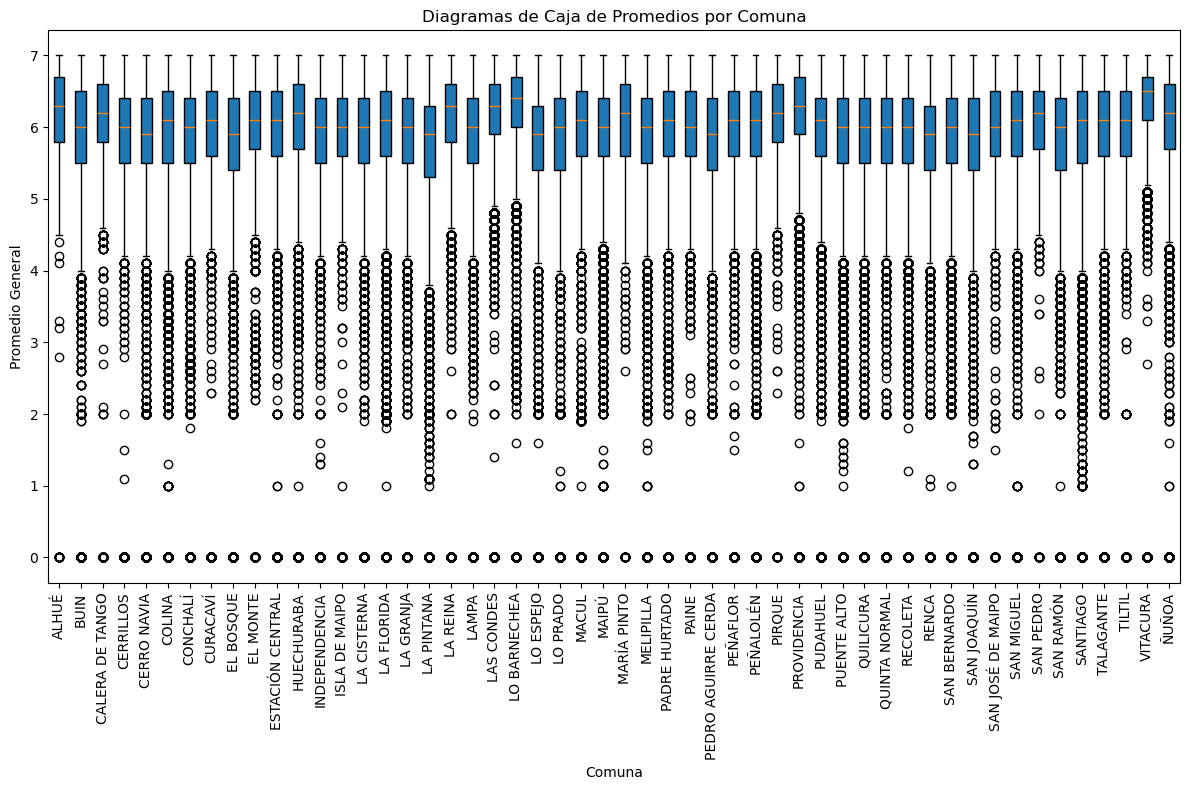

In [11]:
promedios_por_comuna = df_rendimiento_rm.groupby('NOM_COM_RBD')['PROM_GRAL'].mean().reset_index()

data_to_plot = [df_rendimiento_rm[df_rendimiento_rm['NOM_COM_RBD'] == comuna]['PROM_GRAL'] for comuna in promedios_por_comuna['NOM_COM_RBD']]
comunas = promedios_por_comuna['NOM_COM_RBD'].tolist()

plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, patch_artist=True)


plt.xticks(range(1, len(comunas) + 1), comunas, rotation=90)
plt.title('Diagramas de Caja de Promedios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Promedio General')

plt.tight_layout()
plt.show()


## Grafico de estudiantes por genero

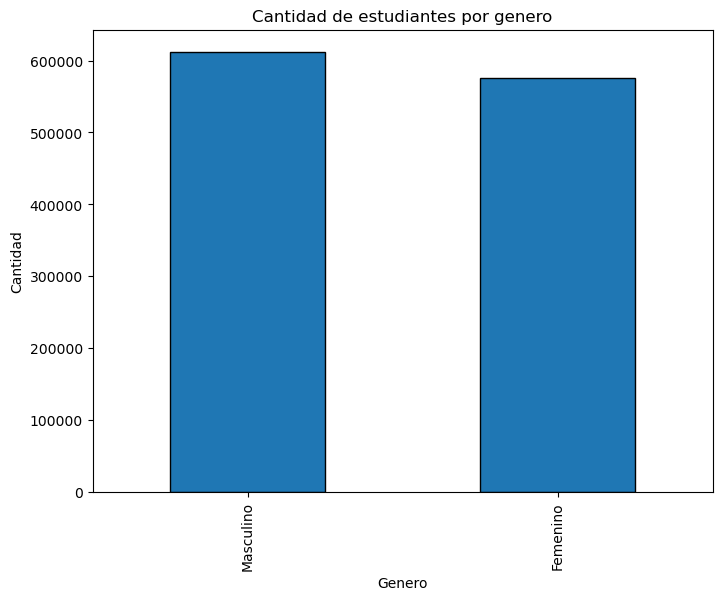

In [12]:
GEN = df_rendimiento_rm["GEN_ALU"].replace({1: "Masculino", 2: "Femenino"}).value_counts()

plt.figure(figsize=(8, 6))
GEN.plot(kind='bar', edgecolor='black')

plt.title("Cantidad de estudiantes por genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad")


plt.show()


In [13]:
#Promedio por genero
GEN_PROM = df_rendimiento_rm.groupby("GEN_ALU")["PROM_GRAL"].mean()
GEN_PROM.reset_index()

,GEN_ALU,PROM_GRAL
0,1,5.750752
1,2,5.925673


In [14]:
#Cantidad de promovidos, reprobados, etc. por genero.
AP_GEN = df_rendimiento_rm.groupby(["GEN_ALU", "SIT_FIN_R"]).size().unstack(fill_value=0)
AP_GEN['Porcentaje_YTR'] = ((AP_GEN['Y']+AP_GEN['T']+ AP_GEN['R'])/ AP_GEN.sum(axis=1)) * 100
AP_GEN

SIT_FIN_R,,P,R,T,Y,Porcentaje_YTR
GEN_ALU,,,,,,
1,116,578283,17183,7,17037,5.586932
2,93,551425,10864,18,12920,4.137176


## Matriz de correlaciones

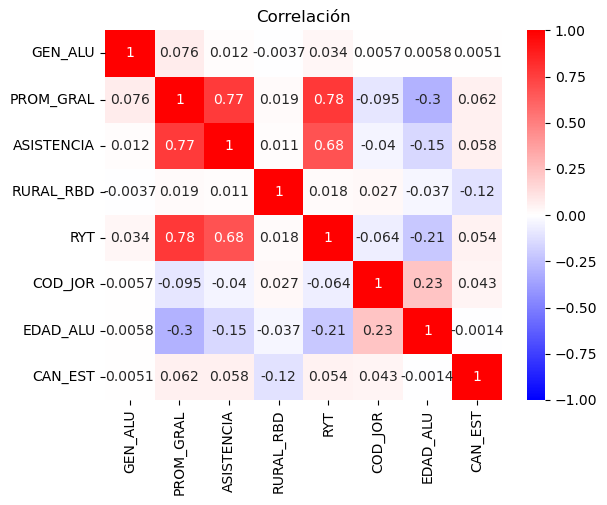

In [15]:
fig, ax = plt.subplots()

sns.heatmap(df_rendimiento_rm[["GEN_ALU", "PROM_GRAL", "ASISTENCIA","RURAL_RBD","RYT","COD_JOR","EDAD_ALU","CAN_EST"]].corr(), annot=True, vmin=-1, cmap='bwr', ax=ax)
ax.set_title("Correlación")

plt.show()

## Grafico de cantidad de estudiantes por jornada

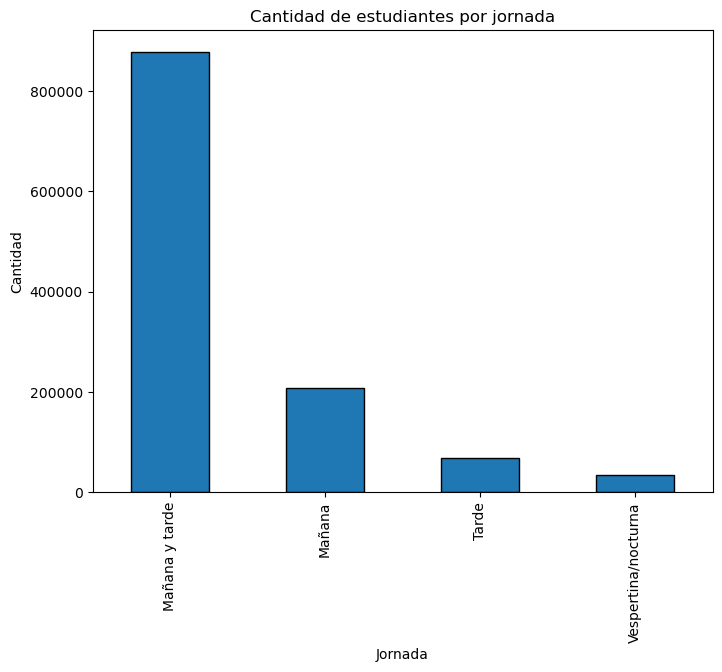

In [16]:
JOR = df_rendimiento_rm["COD_JOR"].replace({1: "Mañana", 2: "Tarde", 3: "Mañana y tarde", 4: "Vespertina/nocturna"}).value_counts()

plt.figure(figsize=(8, 6))
JOR.plot(kind='bar', edgecolor='black')

plt.title("Cantidad de estudiantes por jornada")
plt.xlabel("Jornada")
plt.ylabel("Cantidad")


plt.show()
